\section*{Problem 1}

A sensor on a satellite must be cooled in order to function. It has a mass $M=.05$ kg and a specific heat capacity of $c=300 \, J/kg \, K$.  The surface area of the instrument is $A_s = .02 \, m^2$ and the emissivity of its surface is $\epsilon=0.35$.  The instrument is exposed to a radiative heat transfer from surroundings at $T_{sur}=300 \, K$.  It is connected to a cryocooler removes $Q_{cc}=5 \, W$.  The instrument is exposed to solar radiation that oscillates according to $q''_s = \overline{q''_s}+\Delta q''_s sin(\omega t)$, where $\overline{q''_s}=100 \, W/m^2$, $\Delta q''_s=100 \, W/m^2$, and $\omega = .02094 \, rad/s$.  The initial temperature of the instrument is $T_{int} = 300 \, K$.  Assume the sensor can be modeled with lumped capacitance.

\subsection*{Part 1}
Using an energy balance on the sensor, derive an ordinary differential equation that could be solved for the temperature of the sensor as a function of time $(T(t))$. Identify the initial condition.

\subsection*{Part 1 - Solution}

Since there is no internal heat generation:

\begin{equation}\notag
\ \dot E_{in} - \dot E_{out} = \dot E_{st}
\end{equation}
And the following substitution can be made to derive $\frac{dT}{dt}$:
\begin{equation}\notag
\ (q_{rad,sur} + q_{rad,solar}) - Q_{cc} = \rho c_p V \frac{dT}{dt}
\end{equation}
\begin{equation}\notag
\ (\epsilon \sigma A_s(T_{surr}^4 - T^4) + q''_s A_s) - 5 \, W = \rho c_p V \frac{dT}{dt}
\end{equation}
\begin{equation}\notag
\ A_s(\epsilon \sigma (T_{surr}^4 - T^4) + 100 + 100sin(\omega t)) - 5 \, W = Mc \frac{dT}{dt}
\end{equation}
\begin{equation}\notag
\ \frac{dT}{dt} = \frac{A_s\epsilon \sigma}{Mc}(T_{surr}^4 - T^4) + \frac{100A_s}{Mc} + \frac{100A_s}{Mc} sin(\omega t) - \frac{5}{Mc}
\end{equation}
Similar to the Jupyter notebook example 1-3-1 from the course material, coefficients can be separated for introduction to the code later:
\begin{equation}\notag
\ \frac{dT}{dt} = a(T_{surr}^4 - T^4) + bsin(\omega t) + c
\end{equation}
Where:
\begin{equation}\notag
\ a = \frac{A_s\epsilon \sigma}{Mc}, \, b = \frac{100A_s}{Mc}, \, c = \frac{100A_s - 5}{Mc}
\end{equation}

\subsection*{Part 2}
Either by hand or using a computer program of your choice, solve the ODE and plot the temperature as a function of time until it reaches a steady-periodic oscillatory response (at least 5000 s). Note, if solving by hand, you will need to separate into a homogeneous and a particular ODE.

\subsection*{Part 2 - Solution}

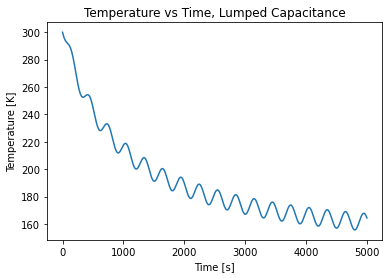

In [217]:
# import necessary libraries
import math
import numpy as np
from numpy import *
from scipy.linalg import solve
from scipy.constants import pi 
from scipy.integrate import odeint
from scipy.constants import Stefan_Boltzmann as sigma
import matplotlib.pyplot as plt

# define constants from problem statement
M         = .05    # kg
cp        = 300.   # J/kg K
A_s       = .02    # m2
eps       = .35    # emissivity
T_sur     = 300.   # K
Q_cc      = 5.     # W
qpp_bar   = 100.   # W/m2
qpp_delta = 100.   # W/m2
omega     = .02094 # rad/s
T_int     = 300.   # K

# define coefficients for the ODE
a = (A_s * eps * sigma)/(M*cp)
b = (100.*A_s)/(M*cp)
c = (100.*A_s-5.)/(M*cp)

def dTdt(T,t,a,b,c, T_sur):
    return (a*(T_sur**4 - T**4) + b*np.sin(omega*t) + c)

t = np.linspace(0,5000,1001)

Temp = odeint(dTdt,T_int,t, args=(a,b,c, T_sur))

plt.plot(t,Temp)
plt.title('Temperature vs Time, Lumped Capacitance')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.show()

\subsection*{Part 3}
At approximately the average temperature of the steady-periodic oscillations, estimate a radiation heat transfer coefficient between the object and the surroundings. Then calculate an effective Biot number.

\subsection*{Part 3 - Solution}

Use the following form to describe the Biot number:
\begin{equation}\notag
\ Bi = \frac{hL_c}{k}
\end{equation}

Where h is the heat transfer coefficient for radiation, $L_c$ is the characteristic length, and k is the thermal conductivity of the sensor.

From Piazza, it was instructed to assume that the sensor is made of Silicon which has a thermal conductivity specified in the code below, with data provided from Table A.1 in the textbook (source at end of homework assignment).  

Additionally, $L_c$ is found using the ratio of $\frac{V}{A_s}$ and the volume can be found under the assumption that the sensor is a sphere.

It can be summarized that the Biot number << 1 and therefore lumped capacitance is an acceptable approach.

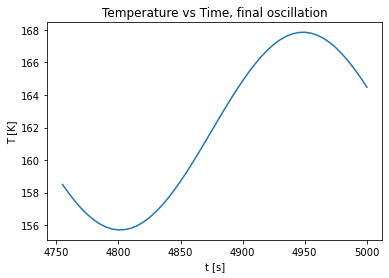

Si_k		= 500.59 W/m K
h_r		= 0.98 W/m2 K
L		= 0.0133 m
Biot number	= 2.60e-05


In [235]:
# find average temp during oscillating steady state
T_avg_ss = np.average(Temp[951:1001])
T_mean = (T_sur + T_avg_ss)/2.

plt.plot(t[951:1001],Temp[951:1001])
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.title('Temperature vs Time, final oscillation')
plt.show()

# find k of silicon at T_avg_ss
Si_T1 = 100. # K
Si_k1 = 884. # W/m K
Si_T2 = 200. # K
Si_k2 = 264. # W/m K
Si_k = np.interp(T_avg_ss,[Si_T1, Si_T2],[Si_k1,Si_k2])

print('Si_k\t\t= %.2f W/m K'%Si_k)

# find h for radiation only
h_r = 4*sigma*eps*T_mean**3
print('h_r\t\t= %.2f W/m2 K'%h_r)

# estimate L (volume to surface area ratio)
r = np.sqrt(A_s/(np.pi*4))
L = r/3.
print('L\t\t= %.4f m'%L)

# calculate and print Biot number
print('Biot number\t= %.2e'%((h_r*L)/Si_k))

\break
\section*{Problem 2}

A thermocouple is embedded in a sample at a known depth while the surface is exposed to a known temperature. The transient evolution of the thermocouple temperature provides data to extract the thermal conductivity of the sample. Consider an experiment with a thermocouple embedded at $L =10 \, mm$ below the surface of a material with density $\rho = 2500 \, kg/m^3$ and specific heat $c_p=1000 \, J/kg \, K$. The surface is suddenly exposed to boiling water and reaches $T_s = 100^{\circ}C$ instantly.

\subsection*{Part 1}

Starting from the heat diffusion equation, simplify the differential equation as much as possible for this system. Identify boundary and initial conditions.

\subsection*{Part 1 - Solution}

Assumptions:
\begin{itemize}
\item Plane wall, 1D heat transfer ($\frac{\partial T}{\partial y} = \frac{\partial T}{\partial z} = 0$)
\item Constant properties (k does not change with time or position)
\item No generation ($\dot q = 0$)
\end{itemize}

Heat diffusion equation:
\begin{equation}\notag
\ \rho c_p\frac{\partial T}{\partial t} = \frac{\partial}{\partial x} (k \frac{\partial T}{\partial x}) + \frac{\partial}{\partial y} (k \frac{\partial T}{\partial y})+\frac{\partial}{\partial z} (k \frac{\partial T}{\partial z}) + \dot q
\end{equation}

And our assumptions reduce the heat diffusion equation to the following: 
\begin{equation}\notag
\ \frac{\partial^2 T}{\partial x^2} = \frac{1}{\alpha} \frac{\partial T}{\partial t} \; \; where: \: \alpha = \frac{k}{\rho c_p}
\end{equation}

We also require 2 Boundary Conditions which are:
\begin{itemize}
\item $T(x \rightarrow \infty, \, t) = T_i$
\item $T(x = 0, \, t) = T_s$
\end{itemize}

And 1 Initial condition:
\begin{itemize}
\item $T(x,t=0) = T_i$
\end{itemize}

\subsection*{Part 2}

Show that your solution in (1) matches one of the cases discussed in class. Identify the correct solution for the temperature as a function of space and time.

\subsection*{Part 2 - Solution}

Part 1 of this problem directly reflects the derivation completed in "Semi Infinite Solids: Concepts and Derivations" lecture from module 3 of the course.  The solution for temperature as a function of space and time is:
\begin{equation}\notag
\ \frac{T(x,t) - T_s}{T_i-T_s} = erf(\frac{x}{2 \sqrt{\alpha t}})
\end{equation}

\subsection*{Part 3}

The thermocouple initially reads $T_i = 20^{\circ}C$. After $\Delta t=80 \, s$, the thermocouple reads $60^{\circ}C$. What is the thermal conductivity of the material?

\subsection*{Part 3 - Solution}

The above equation can be rearranged and solved for k in the following form:
\begin{equation}\notag
\ erf^{-1} \left( \frac{T(x,t) - T_s}{T_i-T_s} \right) = \frac{x}{2 \sqrt{\alpha t}}
\end{equation}
\begin{equation}\notag
\ 2 \sqrt{\alpha t} = \frac{x}{erf^{-1} \left( \frac{T(x,t) - T_s}{T_i-T_s} \right)}
\end{equation}
\begin{equation}\notag
\ \alpha t = \left( \frac{x}{2 \, erf^{-1} \left( \frac{T(x,t) - T_s}{T_i-T_s} \right)} \right)^2
\end{equation}
\begin{equation}\notag
\ k = \frac{\rho c_p}{t} \left( \frac{x}{2 \, erf^{-1} \left( \frac{T(x,t) - T_s}{T_i-T_s} \right)} \right)^2
\end{equation}

In [236]:
# import error function calculations
from scipy import special
from scipy import integrate

# define constants from the problem
L       = .01   # m
rho     = 2500. # kg/m3
cp      = 1000. # J/kg K
T_s     = 100.  # degC
T_i     = 20.   # degC
dt      = 80.   # s
T_L_80s = 60.   # degC

k = (rho*cp/dt)*((L)/(2*special.erfinv((T_L_80s-T_s)/(T_i-T_s))))**2

print('Material thermal conductivity: %.2f W/m K'%k)

Material thermal conductivity: 3.43 W/m K


\subsection*{Part 4}

How much thermal energy per unit area ($J/m^2$) is transferred to the material in the first $80 \: s$?

\subsection*{Part 4 - Solution}

The following equation is used to derive the thermal energy transferred into the material:
\begin{equation}\notag
\ \Delta Q'' = \int_{0}^{80} q''_{x=0}dt
\end{equation}
Where:
\begin{equation}
\ q''_x \Big|_{x=0} = \frac{k(T_s-T_i)}{\sqrt{\pi \alpha t}}
\end{equation}

In [237]:
def qpp(t,T_s,T_i,k,rho,cp):
    return (k*(T_s-T_i))/(np.sqrt(t*np.pi*k/(cp*rho)))

deltaQ_pp = integrate.quad(qpp,0,80,args=(T_s,T_i,k,rho,cp))

print('Total thermal energy per unit area: %.2f kJ/m2'%(deltaQ_pp[0]/1000))

Total thermal energy per unit area: 2365.89 kJ/m2


\subsection*{Part 5}

Plot (a) the temperature of the thermocouple $T(x=10 \: mm, \, t)$ and (b) the heat flux at the surface $q''(x=0, \, t)$ as a function of time from 0 to 10 min.

\subsection*{Part 5 - Solution}

The following equation will be solved across the specified time domain to find the temperature of the thermocouple:
\begin{equation}\notag
\ T(L,t) =(T_i-T_s) erf(\frac{L}{2 \sqrt{\alpha t}})+T_s
\end{equation}

And the following equation will be solved to find the heat flux at the surface:
\begin{equation}
\ q''_x \Big|_{x=0} = \frac{k(T_s-T_i)}{\sqrt{\pi \alpha t}}
\end{equation}

Note that the plot displayed will truncate the values at very small times t (where $q'' \rightarrow \infty$) so that the decay of the function is more clear at later times.

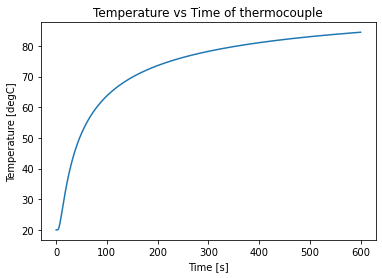

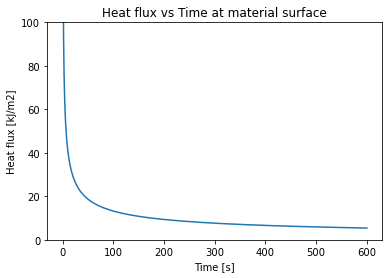

In [238]:
# set grid of times to evaluate the functions
t = np.linspace(0.01,600,601)

def T_tc(T_i,T_s,L,k,rho,cp,t):
    return (T_i-T_s)*special.erf(L/(2*np.sqrt(t*k/(rho*cp))))+T_s

T = T_tc(T_i,T_s,L,k,rho,cp,t)

plt.plot(t,T)
plt.title('Temperature vs Time of thermocouple')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [degC]')
plt.show()

plt.plot(t,qpp(t,T_s,T_i,k,rho,cp)/1000)
plt.title('Heat flux vs Time at material surface')
plt.xlabel('Time [s]')
plt.ylabel('Heat flux [kJ/m2]')
plt.ylim([0,100])
plt.show()

\subsection*{Part 5}

If the sample is 25 mm thick, for approximately what range of times is the semi-infinite approximation a good representation of the temperatures in the sample?

\subsection*{Part 5 - Solution}

Fo number criteria (less than .2)

The semi infinite solid approach is acceptable when the Fourier number is less than 0.2 where:

\begin{equation}\notag
\ Fo = \frac{\alpha t}{L^2}
\end{equation}

Which can be arranged to provide the critical time:

\begin{equation}\notag
\ t_{critical} = \frac{Fo \, L^2}{\alpha}
\end{equation}

In [239]:
alpha = k/(rho*cp)
L = .025

t_crit = (.2*L**2)/alpha

print('The semi infinite solid is valid until %.0f seconds with a 25mm thick sample'%t_crit)

The semi infinite solid is valid until 91 seconds with a 25mm thick sample


\subsection*{Part 5}

Assuming the back side of the sample is well insulated, sketch (by hand) the temperature of the finite length sample ($25 \: mm$ thick) as a function of depth at several times during the heating process: 0 s, 80 s, 200 s, 600 s. Clearly label each line.

\subsection*{Part 5 - Solution}
![Image 1](Images/HW3_2_6_soln.png)